In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pooler as pooler

In [2]:
def build_laplace(size):
    """build tridiagonal matrix representation of laplacian in 1d"""
    a = np.ones(size-1); b = -2*np.ones(size); c = a
    k1=-1; k2=0; k3=1
    A = np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    A[0,1] = 0 ; A[size-1,size-2]=0
    return A

def build_source(x,yL,yR,x0,a,k):
    dx = x[1]-x[0]
    g = a*np.exp(-k*(x-x0)**2) * dx**2
    g[0] = -2 *yL
    g[-1] = -2 * yR
    return g

In [3]:
def generate_coeffs():
    xmin = np.random.randint(-10,10)
    xmax = xmin + np.random.randint(1,10)
    x0 = xmin + (xmax - xmin)/(np.random.randint(1,10))
    yL = np.random.randint(-10,10)
    #yR = np.random.randint(-10,10)
    yR = yL
    a = np.random.randint(-10,10)
    while (a == 0):
        a = np.random.randint(-10,10)
    k = np.random.randint(1,10)
    return x0, xmin, xmax, a, k, yL,yR

In [4]:
def generate_data(size,x0, a, k,yL,yR):
    x = np.linspace(xmin, xmax, size)
    A = build_laplace(size)
    g = build_source(x,yL,yR,x0, a, k)
    return A,g,x

def generate_answer(x0,a, k,yL,yR):
    extremum = []
    for point in np.linspace(100,5000,10):
        A, g, x = generate_data(int(point),x0, a, k,yL,yR)
        y = np.linalg.solve(A,g)
        if (k > 0):
            extremum.append(y.min())
        else:
            extremum.append(y.max())                        
    return extremum[-1], abs(extremum[-1] - extremum[1])
    #plt.plot(np.linspace(100,5000,10),extremum);

In [5]:
x0,xmin,xmax, a, k, yL, yR = generate_coeffs()

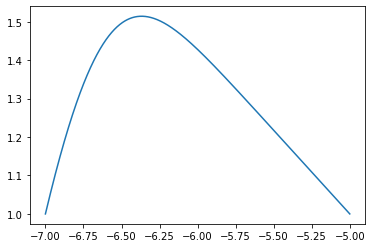

In [6]:
A, g, x = generate_data(1000,x0,a,k,yL,yR)
y = np.linalg.solve(A,g)
plt.plot(x,y);
#if (k > 0):
#    print(y.min())
#else:
#    print(y.max())
#answer, error = generate_answer(x0,k,yL,yR)
#print(answer, error)

[1.5141518923804527,
 1.5143617118590549,
 1.5143487082221891,
 1.514330123972712,
 1.5143311001822979,
 1.5143390874434217,
 1.5143401410106148,
 1.5143397908220397,
 1.5143393112376176,
 1.5143385480921596]

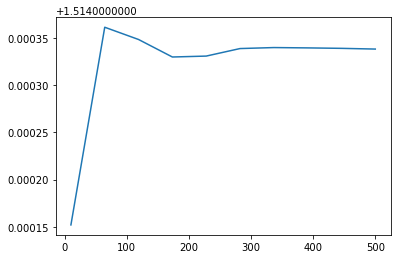

In [7]:
extremum = []
for point in np.linspace(10,500,10):
    A, g, x = generate_data(int(point),x0, a, k,yL,yR)
    y = np.linalg.solve(A,g)
    if (a > 0):
        extremum.append(y.min())
    else:
        extremum.append(y.max())
                        
plt.plot(np.linspace(10,500,10),extremum);
extremum

# Make pool

In [8]:
number_of_questions = 25
my_pool = pooler.setup_pool(number_of_questions)

In [9]:
for i in range(number_of_questions):
    question = my_pool.create_question()    
    x0, xmin, xmax, a, k, yL, yR = generate_coeffs()
    answer, error = generate_answer(x0, a, k,yL,yR)
    my_text_diff1 = """
    <p>Solve the following differential equation<br>
    \( \\frac{\\text{d}^2 y}{\\text{d} x^2} = a\\exp[-k(x-x_0)^2]\)<br>
    in the interval ["""
    
    my_text_diff1 += str(xmin) + ", " + str(xmax) + "], with the boundary conditions \(y_L\) = "
    my_text_diff1 += str(yL) + ", \(y_R\) =" + str(yR) + ".</p>"
    my_text_diff1 += "<p>Set \(k\) = " + str(k) + ", \(a\) =" + str(a) + ", \(x_0\) =" + str('{:f}'.format(x0)) + ".</p>"
    my_text_diff1 += "<p>What is the "
    
    if (a > 0):
        my_text_diff1 += "minimum value of \(y\) in the interval?"
    else:
        my_text_diff1 += "maximum value of \(y\) in the interval?"

    my_pool.set_question_text(question, my_text_diff1)
    my_pool.set_question_accuracy(question, answer, error)
    my_pool.set_question_answer(question, answer)
    my_pool.set_question(question)        


In [10]:
my_pool.tree.write('ODE_gaussian.dat')